In [1]:
import time 
import datetime
import numpy as np
from matplotlib import pyplot as plt 

from EvoPoolOptimizer import EvoPoolOptimizer

# Data preprocessing

### Downloading of DataFrame with desired cities in existing pools 

In [2]:
cities = ['Saint avertin', 'Tarascon', 'Nantes', 'Puygouzon', 'Toulouse', 'Talence', 'Balma', 'Reze', 'Chatellerault', 'Tours', 
          'Montaigu Bouffere', 'Bourges','Frejus', 'Mougins', 'MARIGNANE', 'Pradetan', 'Arles', 'Nice', 'Ollioules', 'MANDELIEU LA NAPOULE', 
          'Martigues', 'Cannes', 'Sete', 'Antibes', 'THIONVILLE', 'SENNECEY', 'ST ETIENNE', 'LYON', 'PAYS VOIRONNAIS', 'RUELISHEIM',
          'SAINT VITOIS', 'LYON', 'GERARDMER', 'KINGERSHEIM', 'DIJON', 'NANCY', 'ST MAUR', 'MICHELET HALLUIN', 'AMIENS', 'VELIZY', 
          'Mouvaux', 'Frépillon', 'CHAVILLE-SEVRES', 'DUNKERQUE', 'LOGNES', 'LAON', 'HARNES', 'CAMBRAI', 'MAROMME CANTELEU', 'ROUEN',
          'ROUEN', '20 Rue Edouard Pailleron, 75019 Paris', 'HEROUVILLE', ' 92100 Boulogne-Billancourt', 'FONTENAYS', 'cormeilles en parisis',
          'ST-JEAN DE BRAYE', 'CAEN', 'WISSOUS', 'CHATEAUDUN', 'LAVAL', '9 Rue Alphonse Baudin, 75011 Paris', 'RENNES', 'PARIS', 
          'CESSON SEVIGNE', 'PIPRIAC', 'SAINT-CLOUD PARIS', 'SAINT-BRIEUC', 'CLAMART', 'MARPIRE CHAMPEAUX', 'BEAUNE', 'ORGERBLON'
          ]

In [3]:
real_pools = {
    'pool1' : ['Saint avertin', 'Tarascon', 'Nantes', 'Puygouzon', 'Toulouse', 'Talence', 'Balma', 'Reze', 'Chatellerault', 'Tours', 'Montaigu Bouffere', 'Bourges'],
    'pool2' : ['Frejus', 'Mougins', 'MARIGNANE', 'Pradetan', 'Arles', 'Nice', 'Ollioules', 'MANDELIEU LA NAPOULE', 'Martigues', 'Cannes', 'Sete', 'Antibes'],
    'pool3' : ['THIONVILLE', 'SENNECEY', 'ST ETIENNE', 'LYON', 'PAYS VOIRONNAIS', 'RUELISHEIM', 'SAINT VITOIS', 'LYON', 'GERARDMER', 'KINGERSHEIM', 'DIJON', 'NANCY'],
    'pool4' : ['ST MAUR', 'MICHELET HALLUIN', 'AMIENS', 'VELIZY', 'Mouvaux', 'Frépillon', 'CHAVILLE-SEVRES', 'DUNKERQUE', 'LOGNES', 'LAON', 'HARNES', 'CAMBRAI'],
    'pool5' : ['MAROMME CANTELEU', 'ROUEN', 'ROUEN', '20 Rue Edouard Pailleron, 75019 Paris', 'HEROUVILLE', ' 92100 Boulogne-Billancourt', 'FONTENAYS', 'cormeilles en parisis', 'ST-JEAN DE BRAYE', 'CAEN', 'WISSOUS', 'CHATEAUDUN'],
    'pool6' : ['LAVAL', '9 Rue Alphonse Baudin, 75011 Paris', 'RENNES', 'PARIS', 'CESSON SEVIGNE', 'PIPRIAC', 'SAINT-CLOUD PARIS', 'SAINT-BRIEUC', 'CLAMART', 'MARPIRE CHAMPEAUX', 'BEAUNE', 'ORGERBLON']
}

### Creation of an Evolutionnary Pool Optimizer Object

In [4]:
opt = EvoPoolOptimizer(cities_list=cities, nb_pools=6, nb_chromosomes=100)


The following cities are duplicated: 
LYON
ROUEN


In [5]:
real_pools_chr = opt.dict_to_chromosome(real_pools)
real_pools_distances = opt.calculate_chromosome_distance(real_pools_chr, pools_details=True)
print(f"\nTotal distance travalled with this configuration : {real_pools_distances}")
opt.display_map_pools_configuration(real_pools_chr)

Distance within each pool : 

{0: 302, 1: 90, 2: 114, 3: 82, 4: 85, 5: 188}

Total distance travalled with this configuration : 861


### Optimization loop

In [8]:
num_iterations = 50_000
measurement_step = 100
nb_measures = num_iterations//measurement_step
measure_idx = 0
mean_distance = np.zeros((nb_measures,))
min_distance = np.zeros((nb_measures,))
max_distance = np.zeros((nb_measures,))

start = time.time()

# define an initial population
population = opt.initialize_population()

for i in range(1, num_iterations+1): 
  
  # calculate the fitness of a population and order its chromosomes fitness by rank
  population_distances = opt.calculate_population_distance(population)
  ordered_fitness_list = opt.order_fitness_list(population_distances)

  # log and plot the results every 'measurement_steps'
  if i % measurement_step == 0:
    mean, min, max = opt.get_fitness_statistics(population)
    mean_distance[measure_idx] = mean
    min_distance[measure_idx] = min
    max_distance[measure_idx] = max
    measure_idx += 1 
    print(f"\rIteration {i} statistics : mean : {mean:.2f}  min : {min:.2f}  max : {max:.2f}", end='')

  # mutate chromosomes from the last population to create a new subset of the population
  ordered_probabilities = opt.calculate_parent_proba(ordered_fitness_list)
  parents = opt.select_parents(parents_probabilities=ordered_probabilities, population=population, nb_parents=80)
  num_permutations = 2 * np.random.randint(1, 5) 
  mutated_chromosomes = opt.mutate_parent_population(parents, num_permutations)
  # select some of the best chromosomes of the last population 
  best_chromosomes = opt.select_best_chromosomes(ordered_fitness_list=ordered_fitness_list, population=population, nb_chromosomes=20)

  # add the best and the mutated chromosomes to create the new population
  population = opt.create_new_population(best_chromosomes, mutated_chromosomes=mutated_chromosomes) 


end = time.time()
print(f"\nOptimization done in : {str(datetime.timedelta(seconds = end-start))}")



Iteration 50000 statistics : mean : 805.51  min : 544.00  max : 1181.00
Optimization done in : 0:07:53.825120


### Printing the final results 

In [9]:
print(f"Best chromosome :")
best_chromosome_idx = ordered_fitness_list[0, 1]
best_chromosome = population[best_chromosome_idx]
print(opt.get_dict_chromosome(best_chromosome))
print()
chromosome_distance = opt.calculate_chromosome_distance(best_chromosome, pools_details=True)
print(f"Total chromosome distance : {chromosome_distance}")

opt.display_map_pools_configuration(best_chromosome)

Best chromosome :
{'Saint avertin': 3, 'Tarascon': 5, 'Nantes': 3, 'Puygouzon': 5, 'Toulouse': 5, 'Talence': 5, 'Balma': 5, 'Reze': 3, 'Chatellerault': 3, 'Tours': 3, 'Montaigu Bouffere': 3, 'Bourges': 4, 'Frejus': 2, 'Mougins': 2, 'MARIGNANE': 2, 'Pradetan': 2, 'Arles': 2, 'Nice': 2, 'Ollioules': 2, 'MANDELIEU LA NAPOULE': 2, 'Martigues': 2, 'Cannes': 2, 'Sete': 5, 'Antibes': 2, 'THIONVILLE': 1, 'SENNECEY': 1, 'ST ETIENNE': 5, 'LYON': 1, 'PAYS VOIRONNAIS': 2, 'RUELISHEIM': 1, 'SAINT VITOIS': 1, 'GERARDMER': 1, 'KINGERSHEIM': 1, 'DIJON': 1, 'NANCY': 1, 'ST MAUR': 0, 'MICHELET HALLUIN': 0, 'AMIENS': 0, 'VELIZY': 4, 'Mouvaux': 0, 'Frépillon': 4, 'CHAVILLE-SEVRES': 4, 'DUNKERQUE': 0, 'LOGNES': 4, 'LAON': 0, 'HARNES': 0, 'CAMBRAI': 0, 'MAROMME CANTELEU': 0, 'ROUEN': 0, '20 Rue Edouard Pailleron, 75019 Paris': 4, 'HEROUVILLE': 4, ' 92100 Boulogne-Billancourt': 4, 'FONTENAYS': 5, 'cormeilles en parisis': 4, 'ST-JEAN DE BRAYE': 4, 'CAEN': 3, 'WISSOUS': 4, 'CHATEAUDUN': 4, 'LAVAL': 3, '9 Rue A

### Evolution of best chromosome metrics

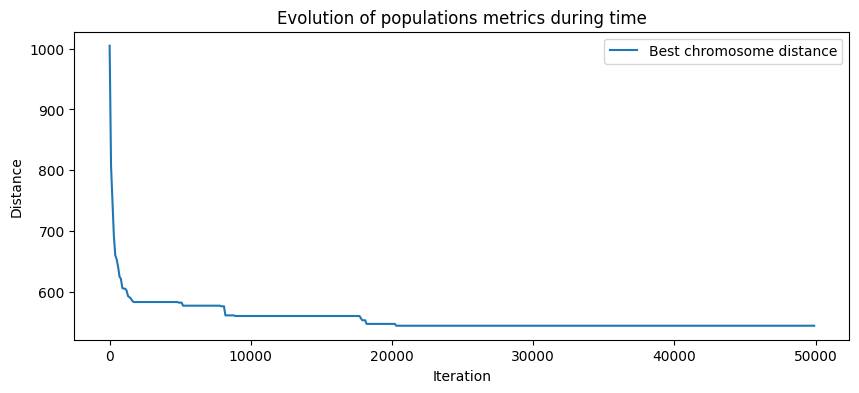

In [10]:
x = np.arange(0, nb_measures) * measurement_step
plt.figure(figsize=(10,4))
plt.plot(x, min_distance, label='Best chromosome distance')
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.legend()

plt.title('Evolution of populations metrics during time')
plt.show()

